# Statistical Analysis in Python

# Load the library

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm

## Task 3: Load in the Dataset in your Jupyter Notebook

In [8]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

_4.1. For the "Median value of owner-occupied homes" provide a boxplot_

Text(0, 0.5, 'Median in $1000')

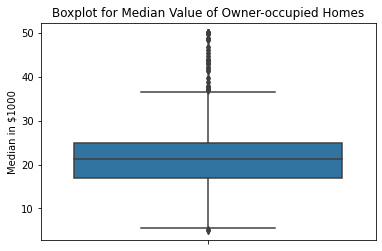

In [9]:
v1 = sns.boxplot(y = boston_df[['MEDV']])
v1.set_title('Boxplot for Median Value of Owner-occupied Homes')
v1.set_ylabel('Median in $1000')

From visualization above, we can see the median value for MEDV variable is approximately 21.

_4.2. Provide a  histogram for the Charles river variable_

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Frequency')

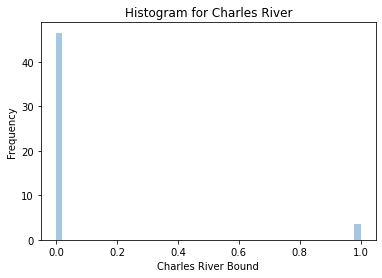

In [10]:
v2 = sns.distplot(boston_df[['CHAS']], bins = 50)
plt.title('Histogram for Charles River')
plt.xlabel('Charles River Bound')
plt.ylabel('Frequency')

From visualization above, we can see that there is less than 10 units which is bound by Charles river.

_4.3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)_

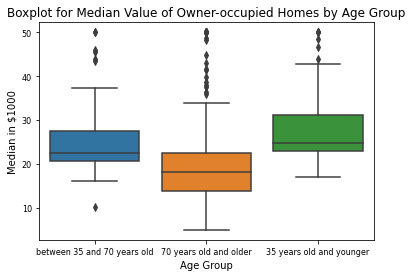

In [11]:
boston_df['age_group'] = 0
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years old and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years old and older'

v3 = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
v3.set_title('Boxplot for Median Value of Owner-occupied Homes by Age Group')
v3.set_ylabel('Median in $1000')
v3.set_xlabel('Age Group')
v3.tick_params(labelsize = 8)

From visualization above, it is shown that 35 years old and younger has the highest median compared to other age groups.

_4.4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?_

Text(0, 0.5, 'non-retail business acres per town')

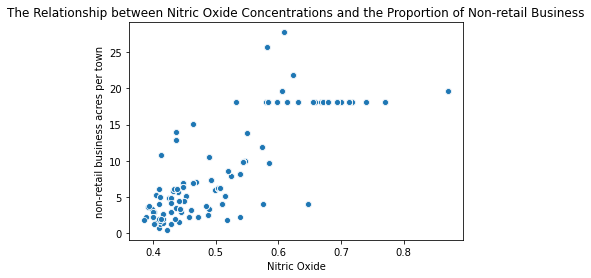

In [12]:
v4 = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.title('The Relationship between Nitric Oxide Concentrations and the Proportion of Non-retail Business')
plt.xlabel('Nitric Oxide')
plt.ylabel('non-retail business acres per town')

From the scatterplot above, it shows there is a positive trajectory relationship between two variables, indicating a potential positive correlation between the two.

_4.5. Create a histogram for the pupil to teacher ratio variable_

Text(0, 0.5, 'Frequency')

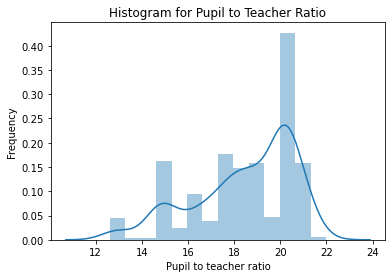

In [13]:
v5 = sns.distplot(boston_df[['PTRATIO']])
plt.title('Histogram for Pupil to Teacher Ratio')
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('Frequency')

From visualization above, it is shown that 20 is the most frequent pupil to teacher ratio by town.

## Task 5: Use the appropriate tests to answer the questions provided.

_5.1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)_

Hypothesis:

Ho = There is no significant difference in median value of houses bounded by the Charles river.

Ha = There is a significant difference in median value of houses bounded by the Charles river.

In [14]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Because levene's test p value is less than 0.05, it means the variances are unequal.

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                     boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**In conclusion, because the p-value from T-test is 0.0036 < α = 0.05, we reject the Ho and accept the Ha that there is a significant difference in median value of houses bounded by Charles river.**

_5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)_

Hypothesis:

Ho = There is no significant difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

Ha = There is a significant difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

In [17]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years old and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years old']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years old and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**In conclusion, since the p-value from ANOVA test is 1.7105 e-15 < α = 0.05, we reject the Ho and accept the Ha that there is a significant difference in Median values of houses for each proportion of owner occupied units built prior 1940.**

_5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)_

Hypothesis:
    
Ho = There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Ha = There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

(0.763651446920915, 7.913361061239593e-98)

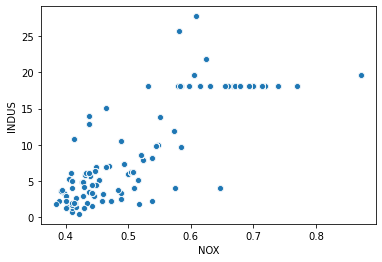

In [19]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

**In conclusion, since the p-value from Pearson correlation coefficient is 7.9133 e-98 < α = 0.05, we reject the Ho and accept Ha that there is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.**

_5.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)_

Hypothesis:

Ho: β1 = 0 (an additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes)

Ha: β1 is not equal 0 (an additional weighted distance to the five Boston employment centres has significant impact on the median value of owner occupied homes)

In [22]:
x = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           1.21e-08
Time:                        07:32:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**In conclusion, since the p-value from Regression analysis is 1.21 e-8 < α = 0.05, we reject the Ho and accept the Ha that β1 is not equal 0 (an additional weighted distance to the five Boston employment centres has significant impact on the median value of owner occupied homes).**